In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
explained_path = "./all_explained_boundaries.tsv"
unexplained_path = "./all_unexplained_boundaries.tsv"

In [3]:
explained_tads = pd.read_csv(explained_path, sep="\t", index_col=None)
unexplained_tads = pd.read_csv(unexplained_path, sep="\t", index_col=None)

In [4]:
all_tads = pd.concat([unexplained_tads, explained_tads])

In [ ]:
all_tads

In [5]:
from itertools import combinations

pairs = list(combinations(["miss_per", "ins16_min", "cont_sum"], 2))

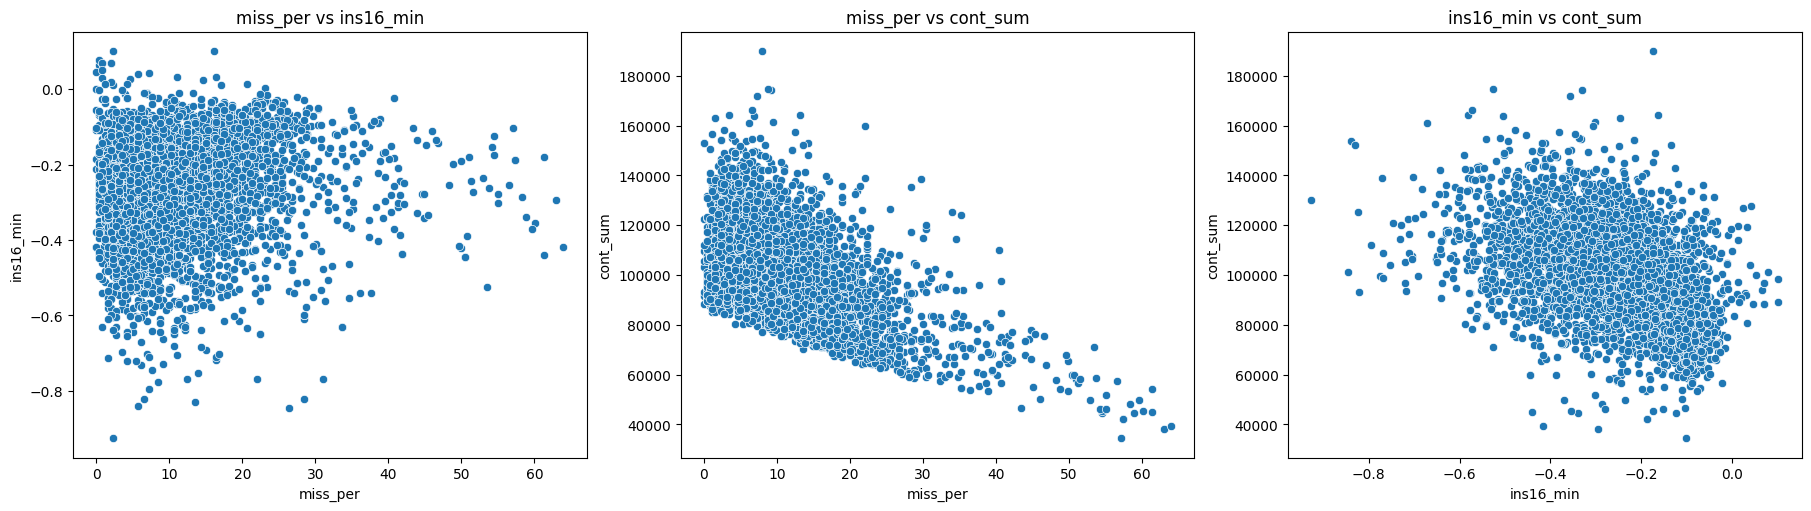

In [6]:
# Set up the figure size
fig, axes = plt.subplots(1, len(pairs), figsize=(len(pairs) * 6, 5), constrained_layout=True)

# Iterate over each pair and create scatterplots
for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=all_tads, x=x, y=y, ax=ax)
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show the plots
plt.show()


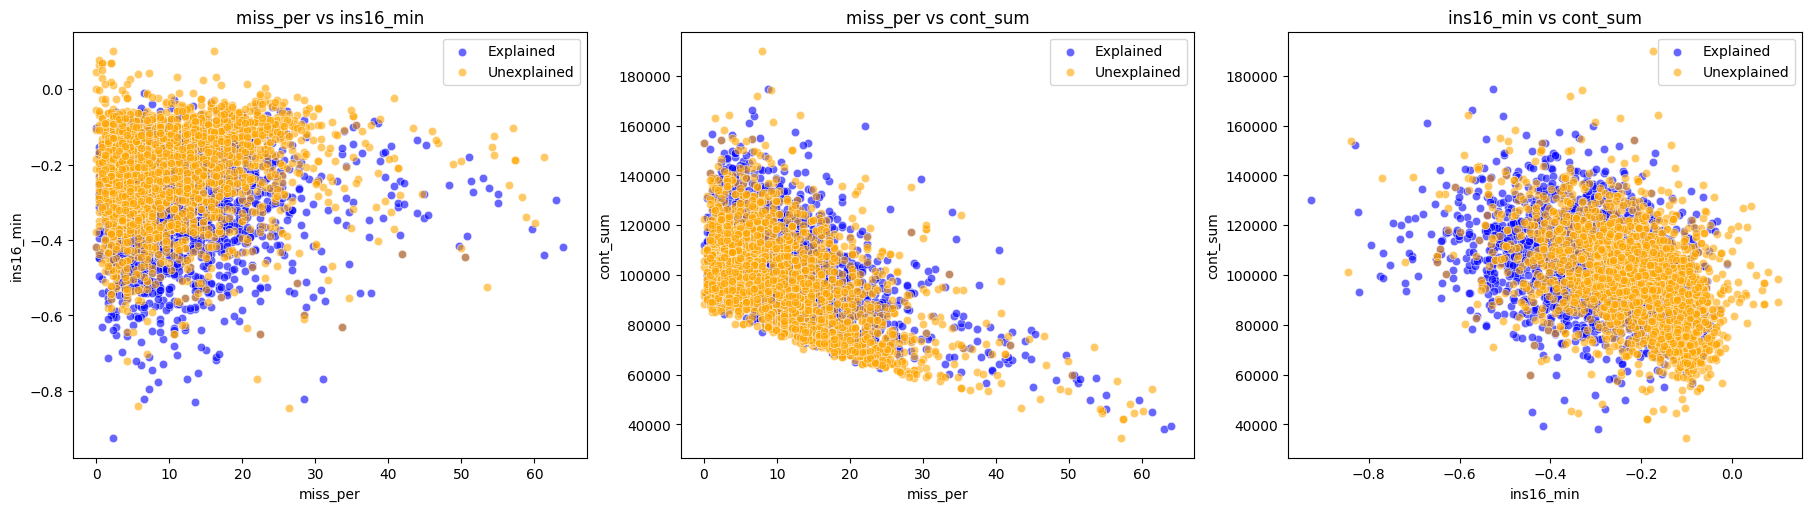

In [7]:
# Set up the figure size
fig, axes = plt.subplots(1, len(pairs), figsize=(len(pairs) * 6, 5), constrained_layout=True)

# Iterate over each pair and create scatterplots
for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=explained_tads, x=x, y=y, ax=ax, alpha=0.6, label='Explained', color='blue')
    sns.scatterplot(data=unexplained_tads, x=x, y=y, ax=ax, alpha=0.6, label='Unexplained', color='orange')
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show the plots
plt.show()

In [8]:
columns_to_average = [f'SCD_h1_m0_t{i}' for i in range(6)]
explained_tads["SCD"] = explained_tads[columns_to_average].mean(axis=1)

In [9]:
unexplained_tads["SCD"] = unexplained_tads[columns_to_average].mean(axis=1)

In [10]:
all_tads["SCD"] = all_tads[columns_to_average].mean(axis=1)

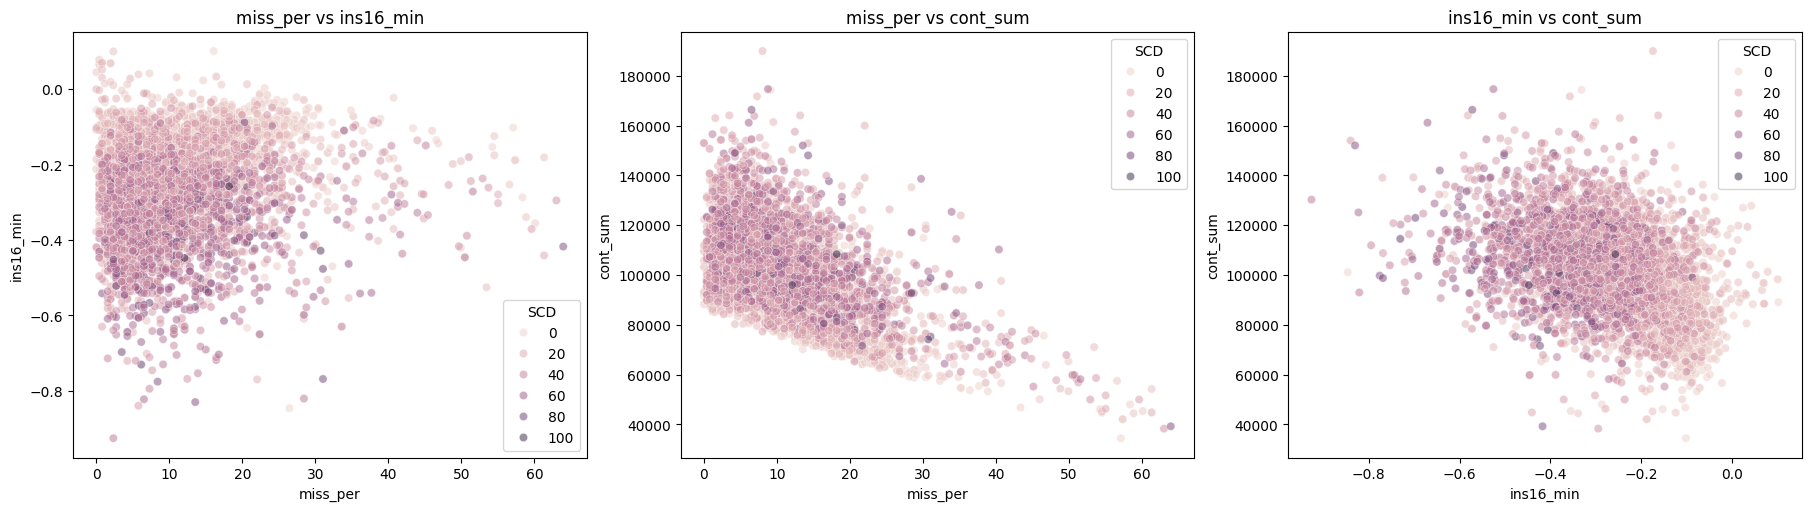

In [11]:
# Set up the figure size
fig, axes = plt.subplots(1, len(pairs), figsize=(len(pairs) * 6, 5), constrained_layout=True)

# Iterate over each pair and create scatterplots
for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=all_tads, x=x, y=y, ax=ax, alpha=0.5, hue="SCD")
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show the plots
plt.show()

In [12]:
from sklearn.cluster import KMeans


In [ ]:
data_for_clustering = all_tads[['miss_per', 'ins16_min', 'cont_sum']]

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
all_tads['cluster'] = kmeans.fit_predict(data_for_clustering)

In [ ]:
# Set up the figure size
fig, axes = plt.subplots(1, len(pairs), figsize=(len(pairs) * 6, 5), constrained_layout=True)

# Iterate over each pair and create scatterplots
for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=all_tads, x=x, y=y, ax=ax, hue='cluster', palette='Set1', alpha=0.6)
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show the plots
plt.show()

In [ ]:
# Create the violin plot to separate 'SCD' by clusters 0 and 1
plt.figure(figsize=(8, 6))
sns.violinplot(data=all_tads, x='cluster', y='SCD', palette='Set1')

# Add titles and labels
plt.title('Violin Plot of SCD by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SCD')

# Show the plot
plt.show()

/tmp/SLURM_24667997/ipykernel_19682/2894442141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=explained_tads, y='miss_per', palette='Set1', ax=axes[0])
/tmp/SLURM_24667997/ipykernel_19682/2894442141.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=unexplained_tads, y='miss_per', palette='Set1', ax=axes[1])


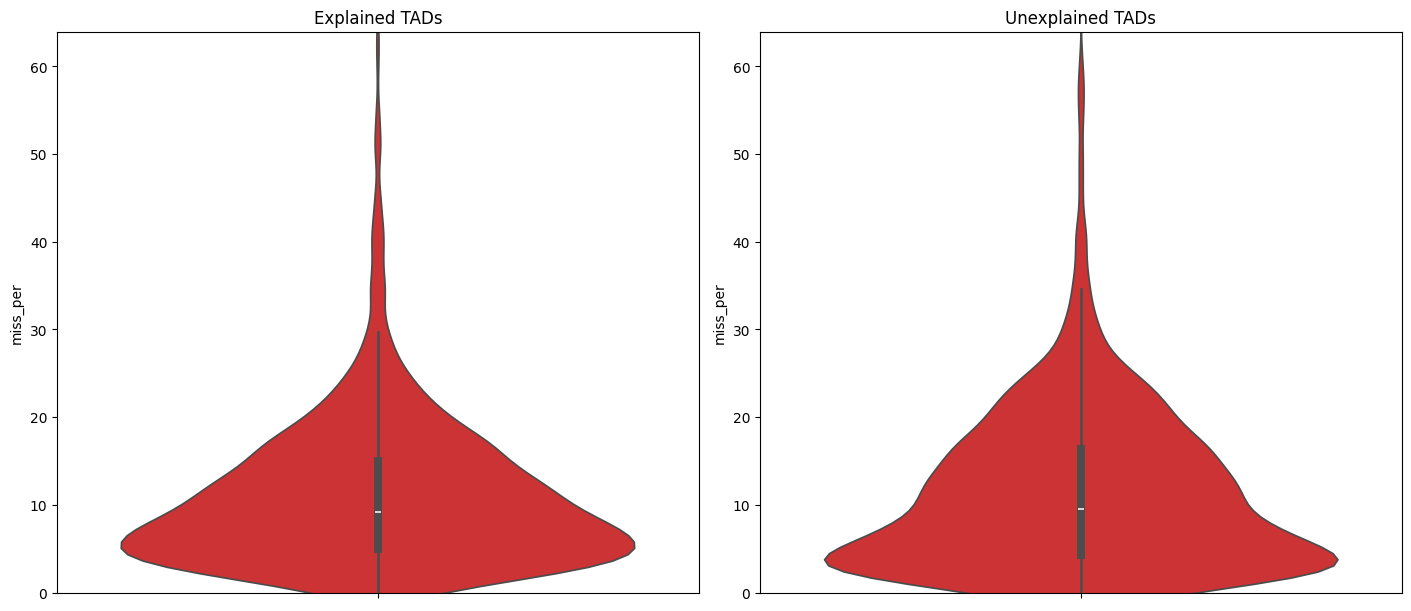

In [13]:
# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot for 'explained_tads' on the first axis
sns.violinplot(data=explained_tads, y='miss_per', palette='Set1', ax=axes[0])
axes[0].set_title('Explained TADs')
axes[0].set_ylabel('miss_per')

# Plot for 'unexplained_tads' on the second axis
sns.violinplot(data=unexplained_tads, y='miss_per', palette='Set1', ax=axes[1])
axes[1].set_title('Unexplained TADs')
axes[1].set_ylabel('miss_per')

# Set the same y-axis range for both plots
y_min = min(explained_tads['miss_per'].min(), unexplained_tads['miss_per'].min())
y_max = max(explained_tads['miss_per'].max(), unexplained_tads['miss_per'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Show the plot
plt.show()

In [ ]:
# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot for 'explained_tads' on the first axis
sns.violinplot(data=explained_tads, y='ins16_min', palette='Set1', ax=axes[0])
axes[0].set_title('Explained TADs')
axes[0].set_ylabel('ins16_min')

# Plot for 'unexplained_tads' on the second axis
sns.violinplot(data=unexplained_tads, y='ins16_min', palette='Set1', ax=axes[1])
axes[1].set_title('Unexplained TADs')
axes[1].set_ylabel('ins16_min')

# Set the same y-axis range for both plots
y_min = min(explained_tads['ins16_min'].min(), unexplained_tads['ins16_min'].min())
y_max = max(explained_tads['ins16_min'].max(), unexplained_tads['ins16_min'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Show the plot
plt.show()

In [ ]:
# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot for 'explained_tads' on the first axis
sns.violinplot(data=explained_tads, y='cont_sum', palette='Set1', ax=axes[0])
axes[0].set_title('Explained TADs')
axes[0].set_ylabel('cont_sum')

# Plot for 'unexplained_tads' on the second axis
sns.violinplot(data=unexplained_tads, y='cont_sum', palette='Set1', ax=axes[1])
axes[1].set_title('Unexplained TADs')
axes[1].set_ylabel('cont_sum')

# Set the same y-axis range for both plots
y_min = min(explained_tads['cont_sum'].min(), unexplained_tads['cont_sum'].min())
y_max = max(explained_tads['cont_sum'].max(), unexplained_tads['cont_sum'].max())
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

# Show the plot
plt.show()

In [ ]:
data_for_clustering = all_tads[['SCD']]

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
all_tads['cluster_scd'] = kmeans.fit_predict(data_for_clustering)

In [ ]:
# Set up the figure size
fig, axes = plt.subplots(1, len(pairs), figsize=(len(pairs) * 6, 5), constrained_layout=True)

# Iterate over each pair and create scatterplots
for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=all_tads, x=x, y=y, ax=ax, hue='cluster_scd', palette='Set1', alpha=0.6)
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show the plots
plt.show()

In [15]:
import numpy as np

In [ ]:
explained_tads

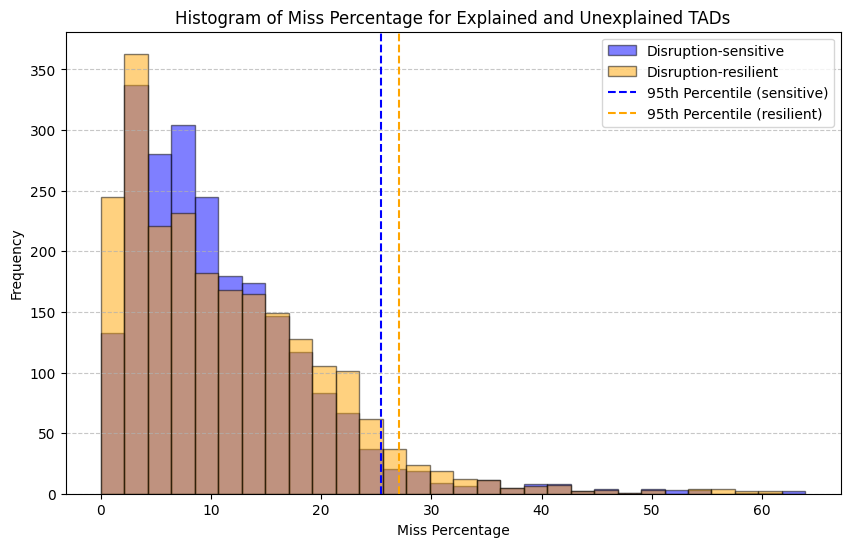

In [19]:
# Combine the data to calculate shared bins
combined_data = np.concatenate([explained_tads['miss_per'], unexplained_tads['miss_per']])
bins = np.histogram_bin_edges(combined_data, bins=30)  # Calculate shared bin edges

# Calculate the 95th percentiles
explained_95th = np.percentile(explained_tads['miss_per'], 95)
unexplained_95th = np.percentile(unexplained_tads['miss_per'], 95)

plt.figure(figsize=(10, 6))

# Plotting the histogram for explained_tads
plt.hist(
    explained_tads['miss_per'], bins=bins, alpha=0.5, 
    label='Disruption-sensitive', color='blue', edgecolor='black'
)

# Plotting the histogram for unexplained_tads
plt.hist(
    unexplained_tads['miss_per'], bins=bins, alpha=0.5, 
    label='Disruption-resilient', color='orange', edgecolor='black'
)

# Adding dashed lines for the 95th percentiles
plt.axvline(explained_95th, color='blue', linestyle='--', linewidth=1.5, label='95th Percentile (sensitive)')
plt.axvline(unexplained_95th, color='orange', linestyle='--', linewidth=1.5, label='95th Percentile (resilient)')

# Adding labels and title
plt.xlabel('Miss Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Miss Percentage for Explained and Unexplained TADs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Uncomment to save the plot
# plt.savefig("./plots/missing_data_assessment.pdf", format="pdf")

# Show the plot
plt.show()


In [20]:
# Calculate the 95th percentile for explained_tads
explained_95th = np.percentile(explained_tads['miss_per'], 95)

# Calculate the 95th percentile for unexplained_tads
unexplained_95th = np.percentile(unexplained_tads['miss_per'], 95)

# Print the results
print(f"95th Percentile - Explained TADs: {explained_95th}")
print(f"95th Percentile - Unexplained TADs: {unexplained_95th}")

95th Percentile - Explained TADs: 25.42852691616414
95th Percentile - Unexplained TADs: 27.10235628056496


In [ ]:
explained_tads

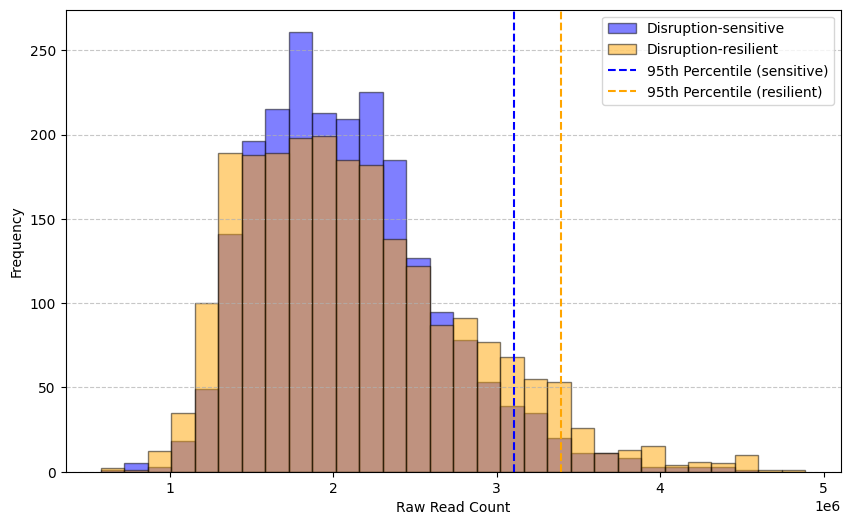

In [22]:
# Combine the data to calculate shared bins
combined_data = np.concatenate([explained_tads['raw_count'], unexplained_tads['raw_count']])
bins = np.histogram_bin_edges(combined_data, bins=30)  # Calculate shared bin edges

# Calculate the 95th percentiles
explained_95th = np.percentile(explained_tads['raw_count'], 95)
unexplained_95th = np.percentile(unexplained_tads['raw_count'], 95)

plt.figure(figsize=(10, 6))

# Plotting the histogram for explained_tads
plt.hist(
    explained_tads['raw_count'], bins=bins, alpha=0.5, 
    label='Disruption-sensitive', color='blue', edgecolor='black'
)

# Plotting the histogram for unexplained_tads
plt.hist(
    unexplained_tads['raw_count'], bins=bins, alpha=0.5, 
    label='Disruption-resilient', color='orange', edgecolor='black'
)

# Add dashed lines for the 95th percentiles
plt.axvline(explained_95th, color='blue', linestyle='--', linewidth=1.5, label="95th Percentile (sensitive)")
plt.axvline(unexplained_95th, color='orange', linestyle='--', linewidth=1.5, label="95th Percentile (resilient)")

# Adding labels and title
plt.xlabel('Raw Read Count')
plt.ylabel('Frequency')
# plt.title('Histogram of Raw Read Count for Explained and Unexplained TADs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Uncomment to save the plot
plt.savefig("./plots/raw_count_assessment.pdf", format="pdf")

# Show the plot
plt.show()


In [23]:
# Calculate the 95th percentile for explained_tads
explained_95th = np.percentile(explained_tads['raw_count'], 95)

# Calculate the 95th percentile for unexplained_tads
unexplained_95th = np.percentile(unexplained_tads['raw_count'], 95)

# Print the results
print(f"95th Percentile - Explained TADs: {explained_95th}")
print(f"95th Percentile - Unexplained TADs: {unexplained_95th}")

95th Percentile - Explained TADs: 3106055.0
95th Percentile - Unexplained TADs: 3395373.2


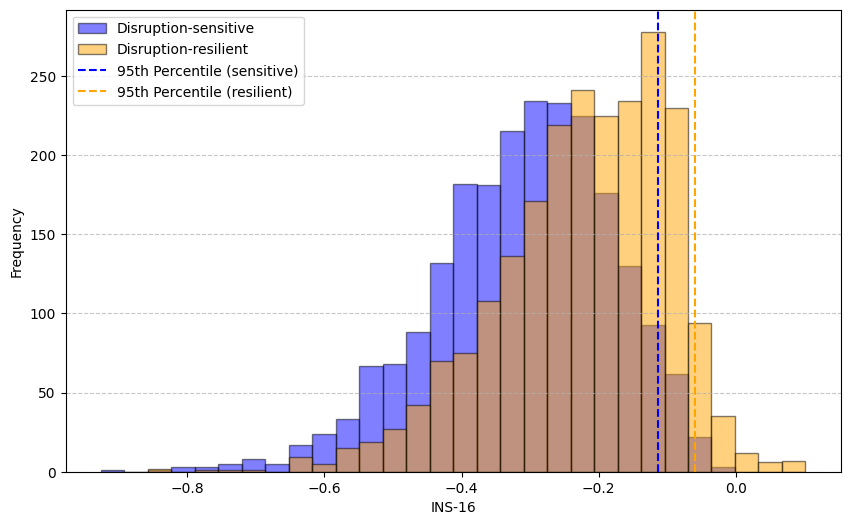

In [26]:
# Combine the data to calculate shared bins
combined_data = np.concatenate([explained_tads['ins16_min'], unexplained_tads['ins16_min']])
bins = np.histogram_bin_edges(combined_data, bins=30)  # Calculate shared bin edges

# Calculate the 95th percentiles
explained_95th = np.percentile(explained_tads['ins16_min'], 95)
unexplained_95th = np.percentile(unexplained_tads['ins16_min'], 95)

plt.figure(figsize=(10, 6))

# Plotting the histogram for explained_tads
plt.hist(
    explained_tads['ins16_min'], bins=bins, alpha=0.5, 
    label='Disruption-sensitive', color='blue', edgecolor='black'
)

# Plotting the histogram for unexplained_tads
plt.hist(
    unexplained_tads['ins16_min'], bins=bins, alpha=0.5, 
    label='Disruption-resilient', color='orange', edgecolor='black'
)

# Add dashed lines for the 95th percentiles
plt.axvline(explained_95th, color='blue', linestyle='--', linewidth=1.5, label="95th Percentile (sensitive)")
plt.axvline(unexplained_95th, color='orange', linestyle='--', linewidth=1.5, label="95th Percentile (resilient)")

# Adding labels and title
plt.xlabel('INS-16')
plt.ylabel('Frequency')
# plt.title('Histogram of Insulation Count for Explained and Unexplained TADs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Uncomment to save the plot
plt.savefig("./plots/ins16_assessment.pdf", format="pdf")

# Show the plot
plt.show()


In [24]:
# Calculate the 95th percentile for explained_tads
explained_95th = np.percentile(explained_tads['ins16_min'], 95)

# Calculate the 95th percentile for unexplained_tads
unexplained_95th = np.percentile(unexplained_tads['ins16_min'], 95)

# Print the results
print(f"95th Percentile - Explained TADs: {explained_95th}")
print(f"95th Percentile - Unexplained TADs: {unexplained_95th}")

95th Percentile - Explained TADs: -0.1133223436772823
95th Percentile - Unexplained TADs: -0.05915316231548785
